In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv("Road_Weather_Information_Stations.csv")


In [3]:
df.head()

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
0,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:46:00 AM,6444193,47.22,47.22
1,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:47:00 AM,6444194,47.22,47.22
2,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:48:00 AM,6444195,47.22,47.22
3,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:49:00 AM,6444196,47.22,47.22
4,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:50:00 AM,6444197,47.22,47.22


In [4]:
df.tail()

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
14060,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:56:00 AM,6394269,50.49,47.67
14061,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:57:00 AM,6394270,50.48,47.65
14062,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:58:00 AM,6394271,50.47,47.65
14063,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:59:00 AM,6394272,50.46,47.65
14064,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 01:00:00 AM,6394273,50.46,47.65


In [5]:
df.isnull().sum()

StationName               0
StationLocation           0
DateTime                  0
RecordId                  0
RoadSurfaceTemperature    0
AirTemperature            0
dtype: int64

In [6]:
df.describe()

,RecordId,RoadSurfaceTemperature,AirTemperature
count,1.406500e+04,14065.000000,14065.00000
mean,4.817993e+06,48.778478,47.27448
std,1.727984e+06,2.636119,1.92964
min,1.697775e+06,43.280000,43.30000
25%,3.322578e+06,47.220000,45.74000
50%,4.700317e+06,48.820000,47.26000
75%,6.425212e+06,49.990000,48.49000
max,6.445467e+06,59.260000,54.54000


In [7]:
df.shape

(14065, 6)

In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour

C:\Users\hp\AppData\Local\Temp\ipykernel_10028\1330258622.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


In [9]:
label_encoder = LabelEncoder()
df['StationName'] = label_encoder.fit_transform(df['StationName'])

In [10]:
feature_columns = ['StationName', 'AirTemperature', 'Year', 'Month', 'Day', 'Hour']
X = df[feature_columns]
y = df['RoadSurfaceTemperature']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def calculate_accuracy(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  
    accuracy = 100 - mape  
    return accuracy

In [26]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [27]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [28]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [29]:
y_train_pred_rf = rf_model.predict(X_train)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_rf)
train_accuracy_rf = calculate_accuracy(y_train, y_train_pred_rf)
test_accuracy_rf = calculate_accuracy(y_test, y_pred_rf)

In [30]:
y_train_pred_xgb = xgb_model.predict(X_train)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_pred_xgb)
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
train_accuracy_xgb = calculate_accuracy(y_train, y_train_pred_xgb)
test_accuracy_xgb = calculate_accuracy(y_test, y_pred_xgb)

In [31]:
y_train_pred_gb = gb_model.predict(X_train)
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_r2_gb = r2_score(y_test, y_pred_gb)
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_pred_gb)
train_accuracy_gb = calculate_accuracy(y_train, y_train_pred_gb)
test_accuracy_gb = calculate_accuracy(y_test, y_pred_gb)

In [18]:
future_dates = [datetime.now() + timedelta(days=i) for i in range(1, 8)]
future_df = pd.DataFrame({
    'StationName': [df['StationName'].mode()[0]] * 7,
    'AirTemperature': [df['AirTemperature'].mean()] * 7,
    'Year': [date.year for date in future_dates],
    'Month': [date.month for date in future_dates],
    'Day': [date.day for date in future_dates],
    'Hour': [12] * 7
})

In [32]:
model_results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "Gradient Boosting"],
    "Train R² Score": [train_r2_rf, train_r2_xgb, train_r2_gb],
    "Test R² Score": [test_r2_rf, test_r2_xgb, test_r2_gb],
    "Train MAE": [train_mae_rf, train_mae_xgb, train_mae_gb],
    "Test MAE": [test_mae_rf, test_mae_xgb, test_mae_gb],
    "Train Accuracy (%)": [train_accuracy_rf, train_accuracy_xgb, train_accuracy_gb],
    "Test Accuracy (%)": [test_accuracy_rf, test_accuracy_xgb, test_accuracy_gb]
}).sort_values(by="Test R² Score", ascending=False)

print("\nModel Training and Test Accuracy Comparison:")
print(model_results)


Model Training and Test Accuracy Comparison:
               Model  Train R² Score  Test R² Score  Train MAE  Test MAE  \
1            XGBoost        0.996497       0.995333   0.104029  0.110968   
0      Random Forest        0.999485       0.994690   0.026428  0.054119   
2  Gradient Boosting        0.966651       0.962212   0.332000  0.349579   

   Train Accuracy (%)  Test Accuracy (%)  
1           99.785075          99.771905  
0           99.945858          99.890326  
2           99.322826          99.290007  


In [33]:
best_model = xgb_model  
y_pred_best = y_pred_xgb

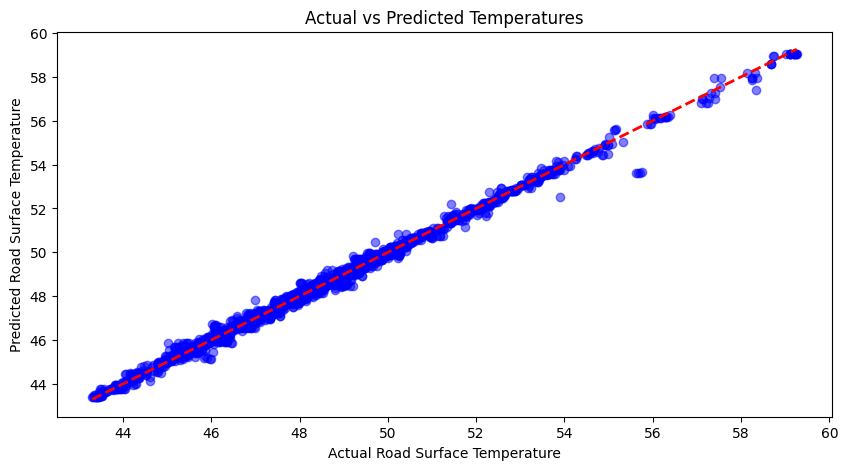

In [34]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_best, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Road Surface Temperature")
plt.ylabel("Predicted Road Surface Temperature")
plt.title("Actual vs Predicted Temperatures")
plt.show()

In [35]:
future_dates = [datetime.now() + timedelta(days=i) for i in range(1, 8)]
future_df = pd.DataFrame({
    'StationName': [df['StationName'].mode()[0]] * 7,
    'AirTemperature': [df['AirTemperature'].mean()] * 7,
    'Year': [date.year for date in future_dates],
    'Month': [date.month for date in future_dates],
    'Day': [date.day for date in future_dates],
    'Hour': [12] * 7
})

In [36]:
future_predictions = best_model.predict(future_df)
future_df['Predicted RoadSurfaceTemperature'] = future_predictions
print("\nNext Week's Temperature Predictions:")
print(future_df[['Year', 'Month', 'Day', 'Predicted RoadSurfaceTemperature']])


Next Week's Temperature Predictions:
   Year  Month  Day  Predicted RoadSurfaceTemperature
0  2025      3    9                         48.383469
1  2025      3   10                         48.383469
2  2025      3   11                         48.383469
3  2025      3   12                         48.383469
4  2025      3   13                         48.383469
5  2025      3   14                         48.383469
6  2025      3   15                         48.383469
